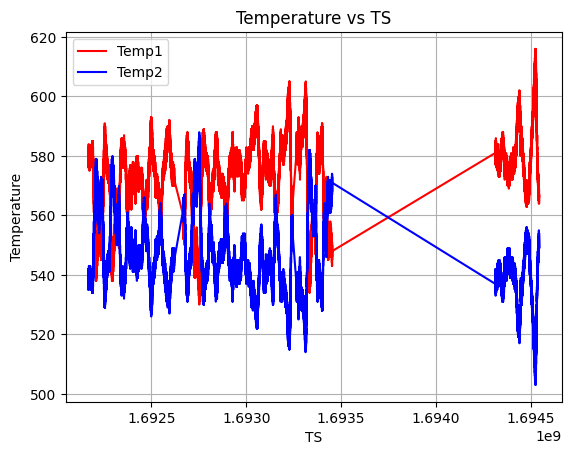

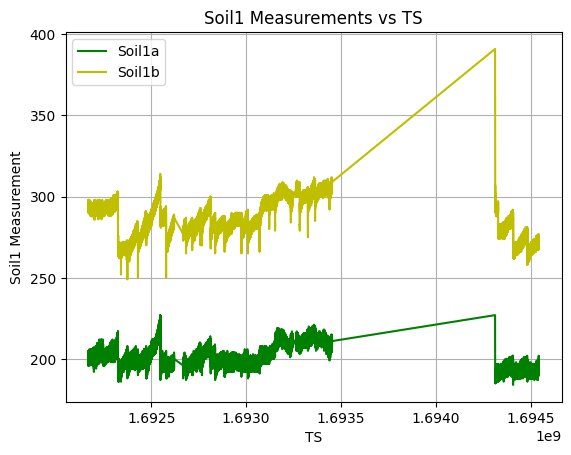

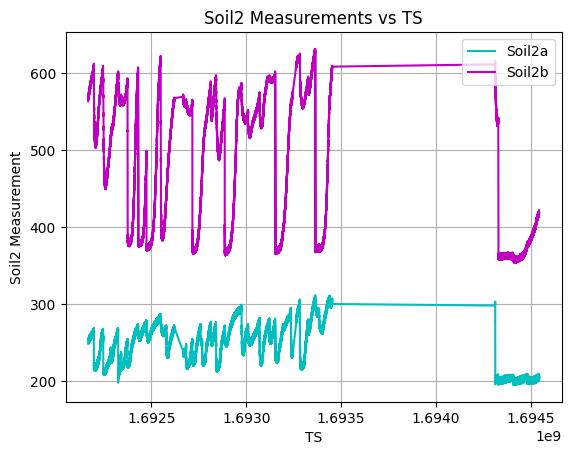

In [3]:
import matplotlib.pyplot as plt
from nicegui import ui
from pymongo import MongoClient

class MongoDBManager:

    def __init__(self, host='192.168.50.41', port=27017, db_name='pf'):
        # Initialize MongoDB client
        self.client = MongoClient(host, port)
        self.db = self.client[db_name]

    def insert_one(self, collection_name, data):
        """Insert one record into a MongoDB collection."""
        collection = self.db[collection_name]
        collection.insert_one(data)

    def insert_many(self, collection_name, data_list):
        """Insert multiple records into a MongoDB collection."""
        collection = self.db[collection_name]
        collection.insert_many(data_list)

    def find(self, collection_name, query=None, projection=None):
        """Query data from a MongoDB collection."""
        collection = self.db[collection_name]
        return collection.find(query, projection)

    def update_one(self, collection_name, filter_query, update_data):
        """Update one record in a MongoDB collection."""
        collection = self.db[collection_name]
        collection.update_one(filter_query, {'$set': update_data})

    def delete_one(self, collection_name, query):
        """Delete one record from a MongoDB collection."""
        collection = self.db[collection_name]
        collection.delete_one(query)

    def close(self):
        """Close MongoDB connection."""
        self.client.close()
        
        
mongoSesh = MongoDBManager()
cursor = mongoSesh.find("dataMaker")
data = [doc for doc in cursor]
# Extracting the data for plotting
TS = [entry['TS'] for entry in data]

temp1 = [entry['therm1'] for entry in data]
temp2 = [entry['therm2'] for entry in data]

soil1a = [entry['soil1a'] for entry in data]
soil1b = [entry['soil1b'] for entry in data]

soil2a = [entry['soil2a'] for entry in data]
soil2b = [entry['soil2b'] for entry in data]

cursor = mongoSesh.find("dataMaker")
data = [doc for doc in cursor]
# Extracting the data for plotting
TS = [entry['TS'] for entry in data]

temp1 = [entry['therm1'] for entry in data]
temp2 = [entry['therm2'] for entry in data]

soil1a = [entry['soil1a'] for entry in data]
soil1b = [entry['soil1b'] for entry in data]

soil2a = [entry['soil2a'] for entry in data]
soil2b = [entry['soil2b'] for entry in data]

# Plot temp1 and temp2 vs TS
plt.figure()
plt.plot(TS, temp1, label='Temp1', color='r')
plt.plot(TS, temp2, label='Temp2', color='b')
plt.xlabel('TS')
plt.ylabel('Temperature')
plt.legend()
plt.title('Temperature vs TS')
plt.grid(True)
plt.show()

# Plot soil1a and soil1b vs TS
plt.figure()
plt.plot(TS, soil1a, label='Soil1a', color='g')
plt.plot(TS, soil1b, label='Soil1b', color='y')
plt.xlabel('TS')
plt.ylabel('Soil1 Measurement')
plt.legend()
plt.title('Soil1 Measurements vs TS')
plt.grid(True)
plt.show()

# Plot soil2a and soil2b vs TS
plt.figure()
plt.plot(TS, soil2a, label='Soil2a', color='c')
plt.plot(TS, soil2b, label='Soil2b', color='m')
plt.xlabel('TS')
plt.ylabel('Soil2 Measurement')
plt.legend()
plt.title('Soil2 Measurements vs TS')
plt.grid(True)
plt.show()